In [1]:
#import relevant libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the data
ebola_data = pd.read_csv('ebola_2014_2016_clean.csv')
ebola_data.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0


In [3]:
# Compute summary statistics for the dataset
summary_statistics = ebola_data.describe()

summary_statistics
# Save the summary statistics to a CSV file
# summary_statistics.to_csv('ebola_summary_statistics.csv')

,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
count,2366.000000,2436.000000,2484.000000,2477.000000,1308.000000,1526.000000,1648.000000,2485.000000
mean,891.841505,263.733580,1436.616345,2553.678644,32.899083,104.535387,781.662015,1028.347686
std,1828.699240,561.483886,2574.200797,4427.118148,73.166362,161.420208,1258.113098,1656.064372
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,7.000000,8.000000,0.000000,1.000000,2.000000,6.000000
75%,17.000000,287.000000,3118.000000,3657.000000,0.000000,208.000000,1760.750000,2386.000000
max,5636.000000,2106.000000,8704.000000,14122.000000,661.000000,803.000000,3858.000000,4806.000000


In [112]:
# Columns in the dataset
ebola_data.columns

Index(['Country', 'No. of suspected cases', 'No. of probable cases',
       'No. of confirmed cases',
       'No. of confirmed, probable and suspected cases',
       'No. of suspected deaths', 'No. of probable deaths',
       'No. of confirmed deaths',
       'No. of confirmed, probable and suspected deaths', 'YearMonth',
       'YearWeek'],
      dtype='object')

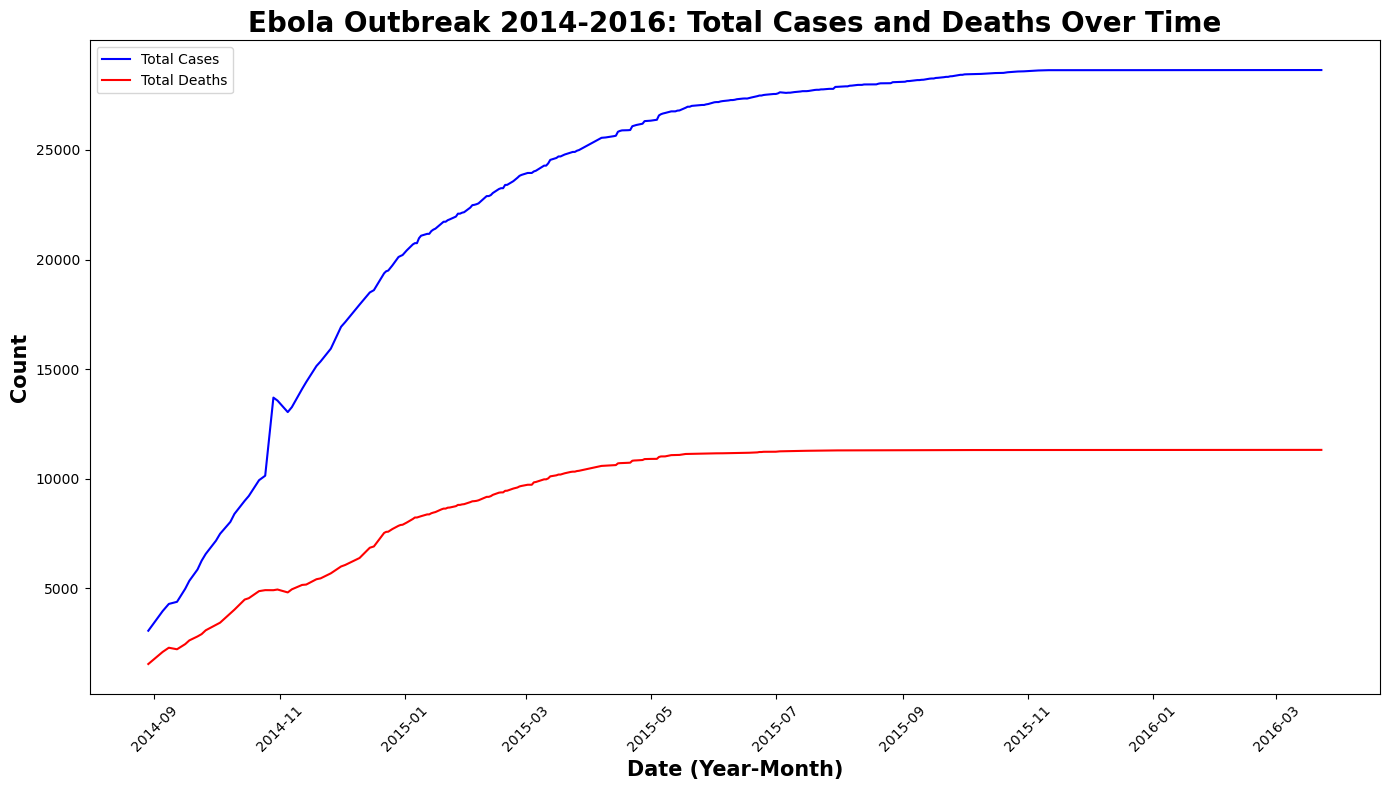

In [6]:

# Aggregating data by date for time series analysis
daily_cases = ebola_data.groupby('Date')['No. of confirmed, probable and suspected cases'].sum()
daily_deaths = ebola_data.groupby('Date')['No. of confirmed, probable and suspected deaths'].sum()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x=daily_cases.index, y=daily_cases, label='Total Cases', color='blue')
sns.lineplot(x=daily_deaths.index, y=daily_deaths, label='Total Deaths', color='red')

# Set title with bold, bigger, and thick font
plt.title('Ebola Outbreak 2014-2016: Total Cases and Deaths Over Time', fontweight='bold', fontsize=20)

# Set x and y axis labels with bold, bigger, and thick font
plt.xlabel('Date (Year-Month)', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()


plt.savefig('ebola_outbreak_plot.png', dpi=300)

# Display the plot
plt.show()

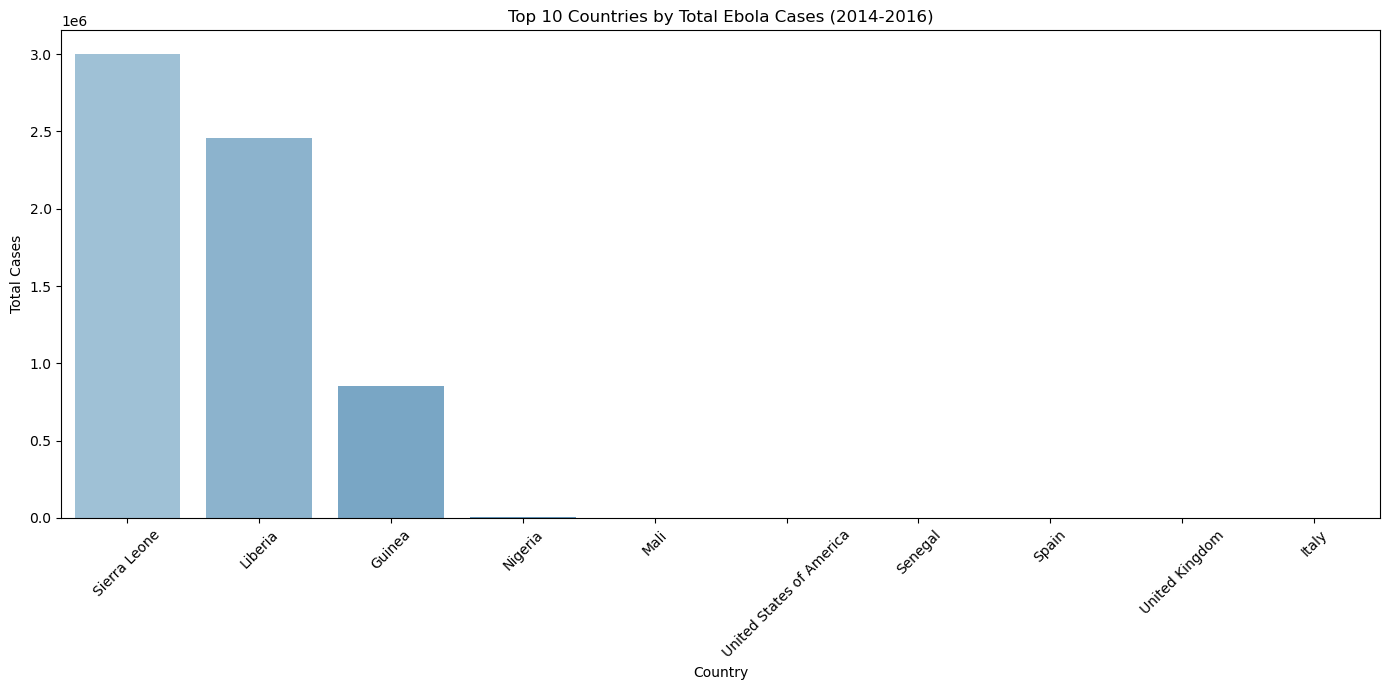

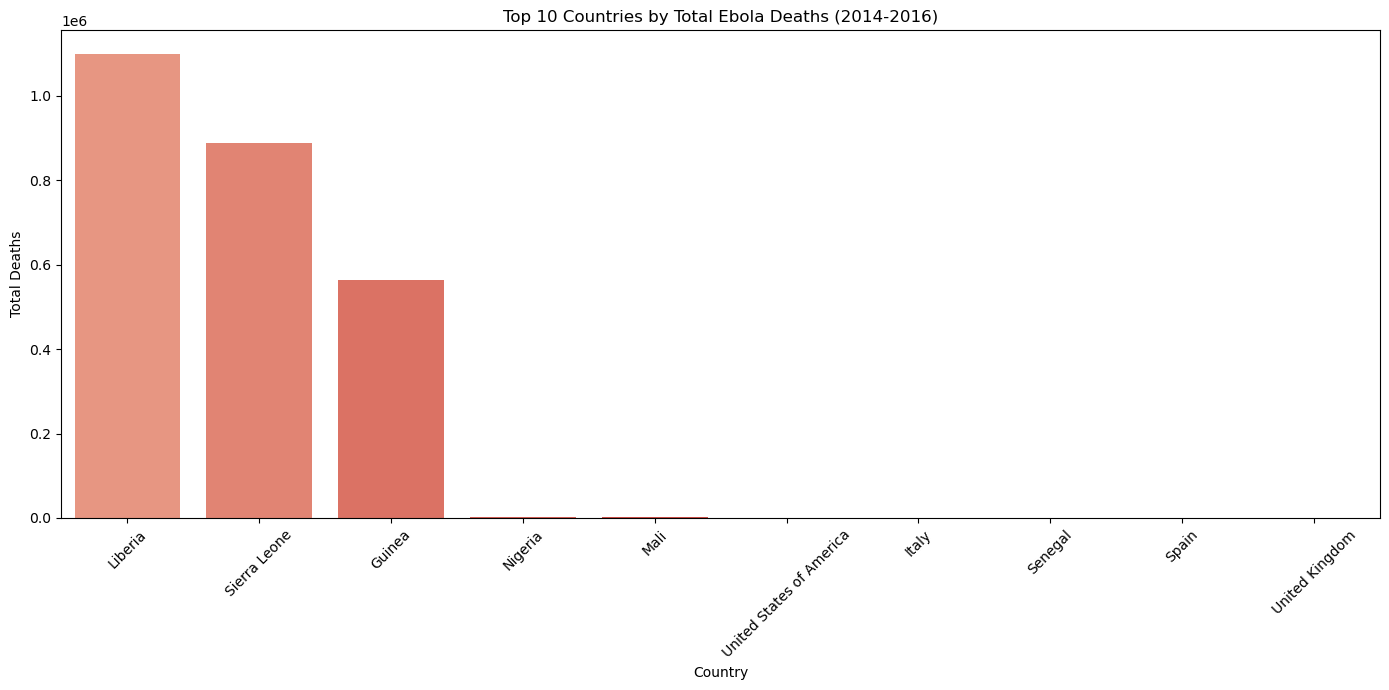

In [7]:
# Aggregating data by country
country_cases = ebola_data.groupby('Country')['No. of confirmed, probable and suspected cases'].sum().sort_values(ascending=False)
country_deaths = ebola_data.groupby('Country')['No. of confirmed, probable and suspected deaths'].sum().sort_values(ascending=False)

# Plotting the top 10 countries by total cases
plt.figure(figsize=(14, 7))
sns.barplot(x=country_cases[:10].index, y=country_cases[:10], palette='Blues_d')
plt.title('Top 10 Countries by Total Ebola Cases (2014-2016)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the top 10 countries by total deaths
plt.figure(figsize=(14, 7))
sns.barplot(x=country_deaths[:10].index, y=country_deaths[:10], palette='Reds_d')
plt.title('Top 10 Countries by Total Ebola Deaths (2014-2016)')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


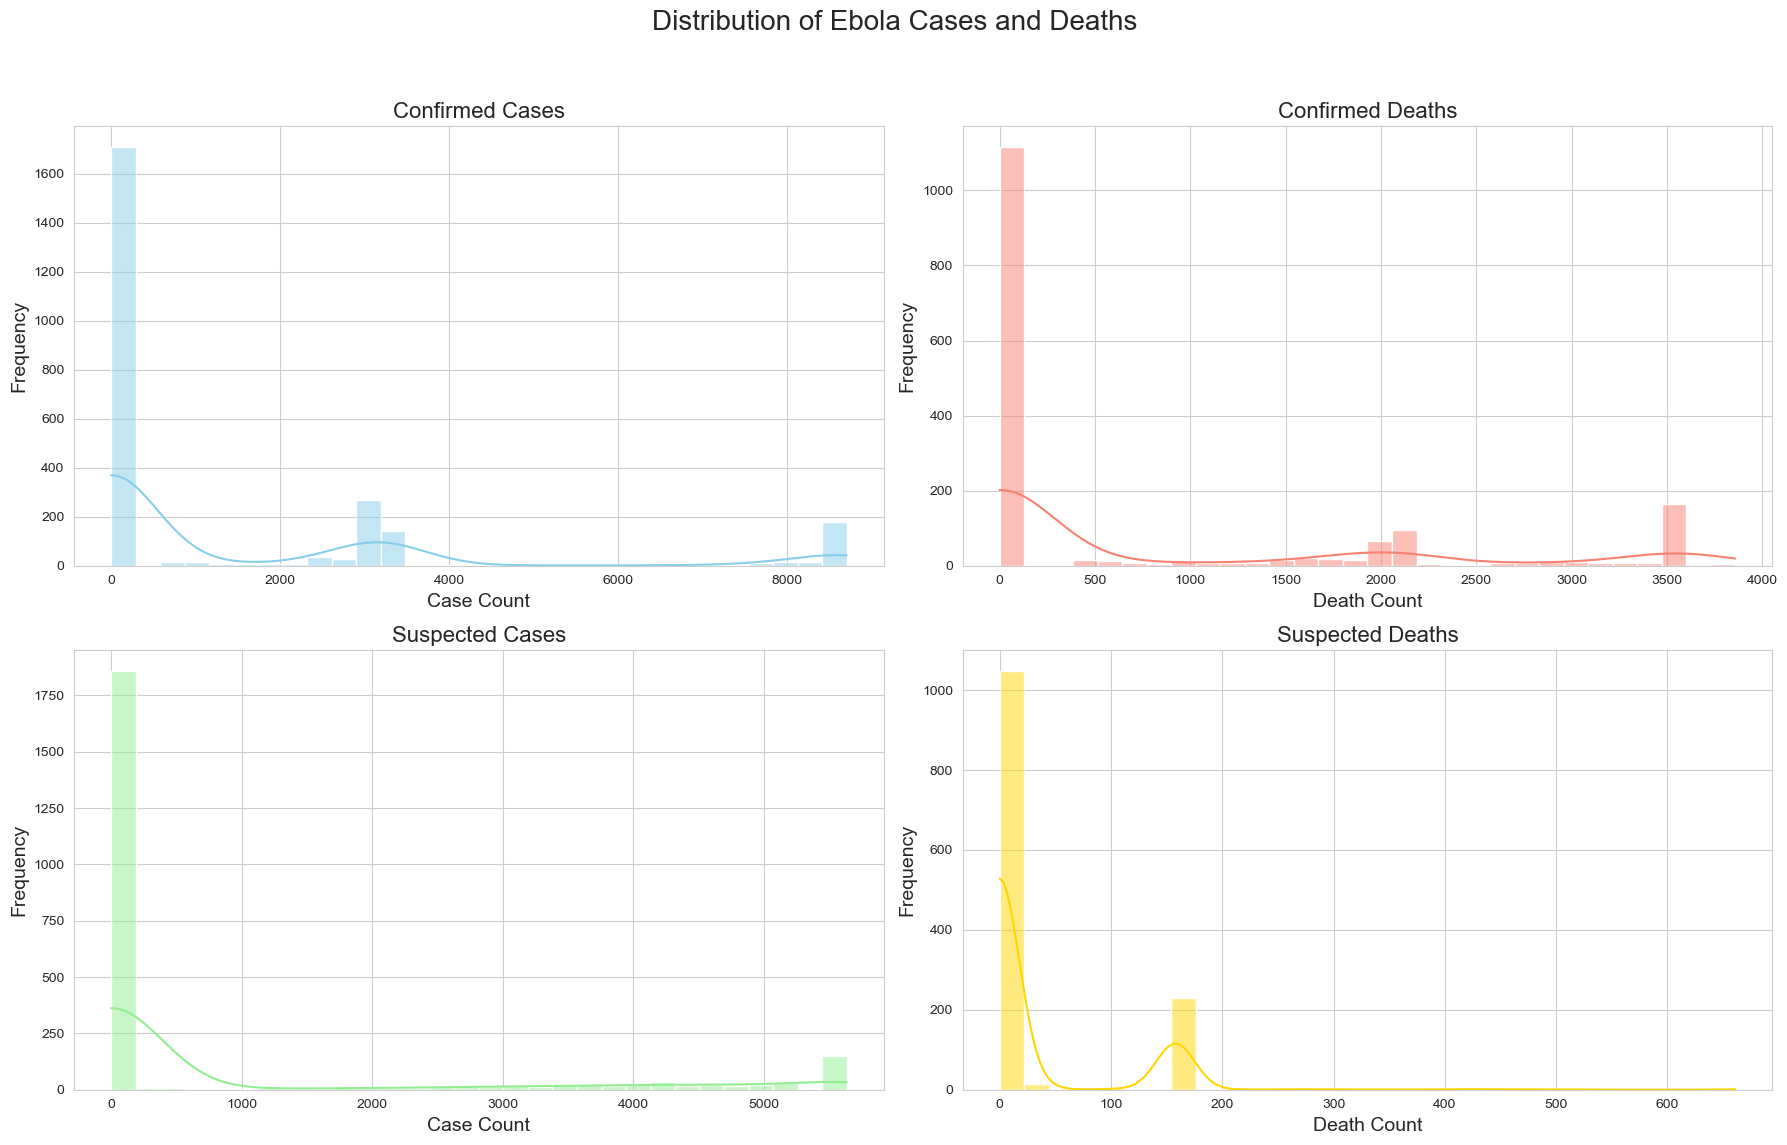

In [8]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")


# Prepare figure layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Ebola Cases and Deaths', fontsize=20)

# Plot histograms
sns.histplot(ebola_data['No. of confirmed cases'], bins=30, ax=axes[0, 0], color='skyblue', kde=True)
axes[0, 0].set_title('Confirmed Cases', fontsize=16)
axes[0, 0].set_xlabel('Case Count', fontsize=14)
axes[0, 0].set_ylabel('Frequency', fontsize=14)

sns.histplot(ebola_data['No. of confirmed deaths'], bins=30, ax=axes[0, 1], color='salmon', kde=True)
axes[0, 1].set_title('Confirmed Deaths', fontsize=16)
axes[0, 1].set_xlabel('Death Count', fontsize=14)
axes[0, 1].set_ylabel('Frequency', fontsize=14)

sns.histplot(ebola_data['No. of suspected cases'], bins=30, ax=axes[1, 0], color='lightgreen', kde=True)
axes[1, 0].set_title('Suspected Cases', fontsize=16)
axes[1, 0].set_xlabel('Case Count', fontsize=14)
axes[1, 0].set_ylabel('Frequency', fontsize=14)

sns.histplot(ebola_data['No. of suspected deaths'], bins=30, ax=axes[1, 1], color='gold', kde=True)
axes[1, 1].set_title('Suspected Deaths', fontsize=16)
axes[1, 1].set_xlabel('Death Count', fontsize=14)
axes[1, 1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

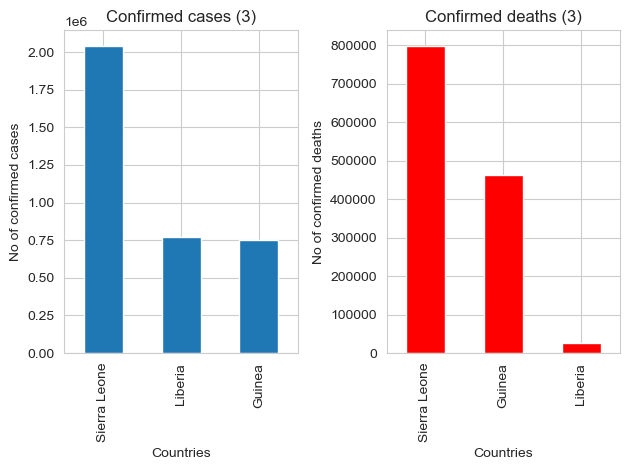

In [9]:
# Barchart showing Countries with the highest number of confirmed cases and highest number confirmed deaths(3)
plt.subplot(1,2,1)
ebola_data.groupby('Country')['No. of confirmed cases'].sum().nlargest(3).plot(kind = 'bar', grid = True)
plt.title('Confirmed cases (3)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed cases')
plt.subplot(1,2,2)
ebola_data.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3).plot(kind = 'bar', grid = True,
                                                                       color = 'red')
plt.title('Confirmed deaths (3)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed deaths')
plt.tight_layout()
plt.show()

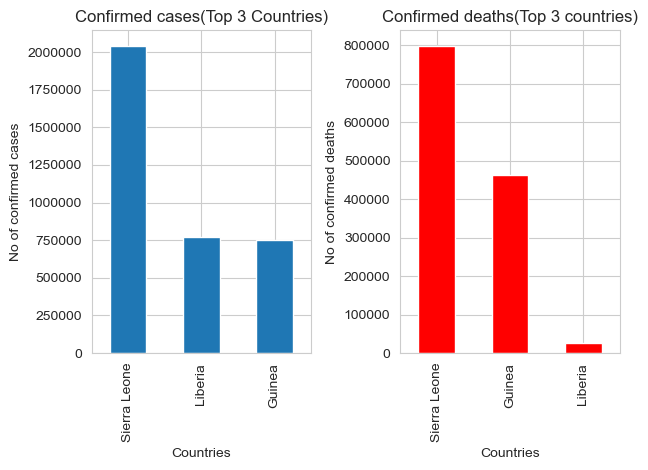

In [10]:


# Barchart showing Countries with the highest number of confirmed cases and highest number confirmed deaths(3)
plt.subplot(1,2,1)
cases = ebola_data.groupby('Country')['No. of confirmed cases'].sum().nlargest(3)
cases.plot(kind='bar', grid=True)
plt.title('Confirmed cases(Top 3 Countries)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed cases')
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis

plt.subplot(1,2,2)
deaths = ebola_data.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3)
deaths.plot(kind='bar', grid=True, color='red')
plt.title('Confirmed deaths(Top 3 countries)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed deaths')
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis

# Adjust spacing between the two graphs
plt.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Adjust space between graphs

plt.tight_layout()

# Save the plot as an image
plt.savefig('ebola_outbreak_Top3.png', dpi=300)
plt.show()


In [15]:
# Top three countries with the highest number of confirmed cases
cases = ebola_data.groupby('Country')['No. of confirmed cases'].sum().nlargest(3)
cases

Country
Sierra Leone    2041871.0
Liberia          768738.0
Guinea           749622.0
Name: No. of confirmed cases, dtype: float64

In [16]:
# Top three countries with the highest number of confirmed deaths
deaths = ebola_data.groupby('Country')['No. of confirmed deaths'].sum().nlargest(3)
deaths

Country
Sierra Leone    797984.0
Guinea          461211.0
Liberia          26937.0
Name: No. of confirmed deaths, dtype: float64

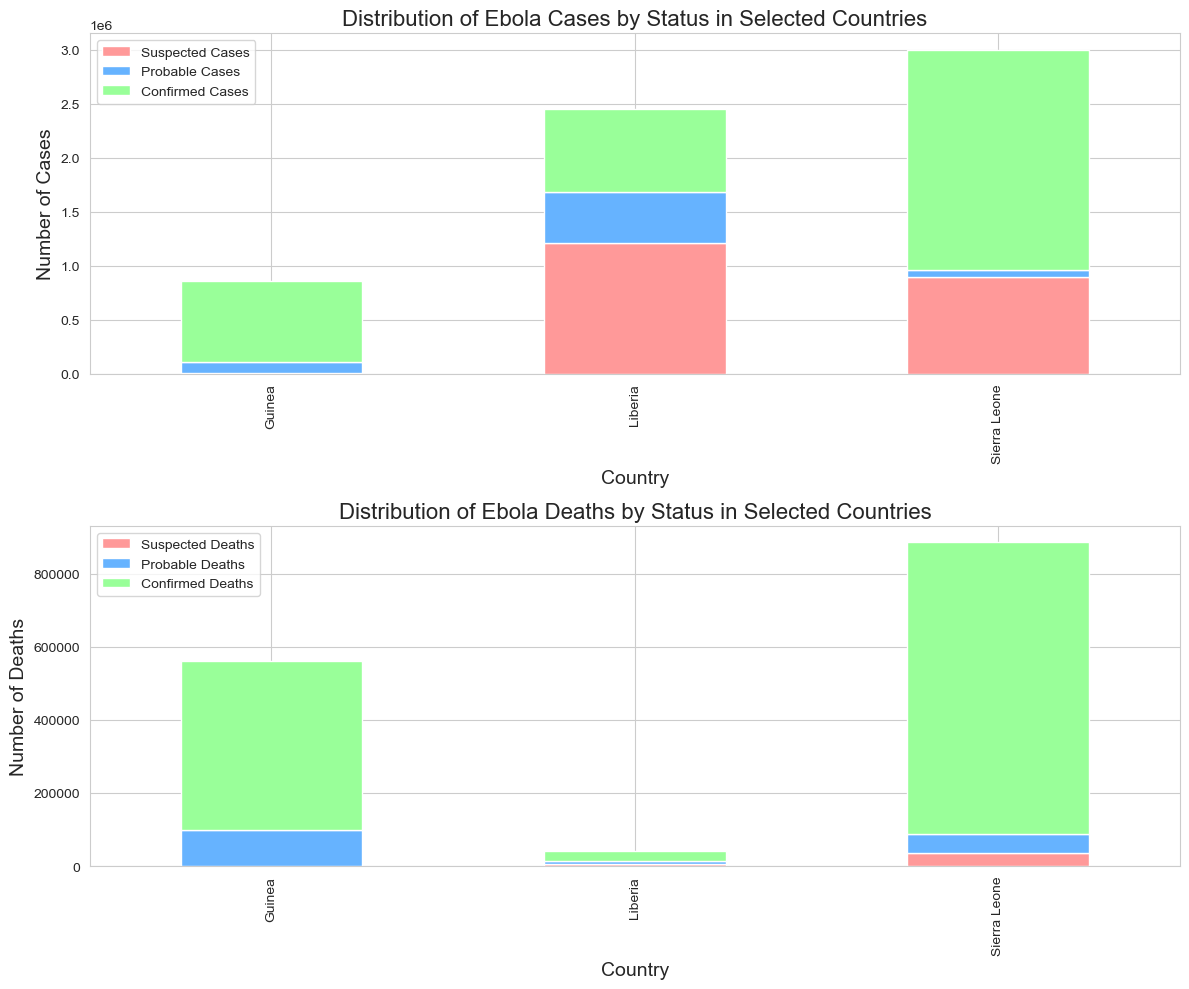

In [17]:
# Aggregate data for suspected, probable, and confirmed cases and deaths by country
case_death_columns = [
    'No. of suspected cases', 'No. of probable cases', 'No. of confirmed cases',
    'No. of suspected deaths', 'No. of probable deaths', 'No. of confirmed deaths'
]
country_cases_deaths_totals = ebola_data.groupby('Country')[case_death_columns].sum().reset_index()

# Selecting a subset of countries for clearer visualization
selected_countries = ['Guinea', 'Liberia', 'Sierra Leone']
selected_data = country_cases_deaths_totals[country_cases_deaths_totals['Country'].isin(selected_countries)]

# Stacked bar plot for cases
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Cases
selected_data[['Country', 'No. of suspected cases', 'No. of probable cases', 'No. of confirmed cases']].set_index('Country').plot(kind='bar', stacked=True, ax=ax[0], color=['#ff9999','#66b3ff','#99ff99'])
ax[0].set_title('Distribution of Ebola Cases by Status in Selected Countries', fontsize=16)
ax[0].set_ylabel('Number of Cases', fontsize=14)
ax[0].set_xlabel('Country', fontsize=14)
ax[0].legend(['Suspected Cases', 'Probable Cases', 'Confirmed Cases'])

# Deaths
selected_data[['Country', 'No. of suspected deaths', 'No. of probable deaths', 'No. of confirmed deaths']].set_index('Country').plot(kind='bar', stacked=True, ax=ax[1], color=['#ff9999','#66b3ff','#99ff99'])
ax[1].set_title('Distribution of Ebola Deaths by Status in Selected Countries', fontsize=16)
ax[1].set_ylabel('Number of Deaths', fontsize=14)
ax[1].set_xlabel('Country', fontsize=14)
ax[1].legend(['Suspected Deaths', 'Probable Deaths', 'Confirmed Deaths'])

plt.tight_layout()
plt.show()


In [19]:
# ebola_data.columns

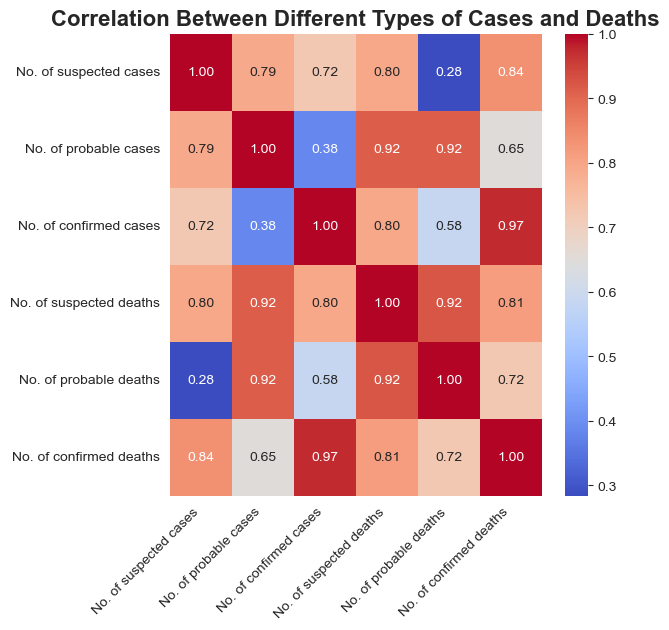

In [21]:

# Heatmap: Correlation between different types of cases and deaths
correlation_matrix = ebola_data[['No. of suspected cases', 'No. of probable cases', 'No. of confirmed cases', 'No. of suspected deaths', 'No. of probable deaths', 'No. of confirmed deaths']].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adjusting title font properties
plt.title('Correlation Between Different Types of Cases and Deaths', fontsize=16, fontweight='bold')

# Adjusting x-axis tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as an image
plt.savefig('correlation_heatmap.png', bbox_inches='tight')  # Save as PNG with tight bounding box



# Save the plot as an image
plt.savefig('correlations.png', dpi=300)

plt.show()

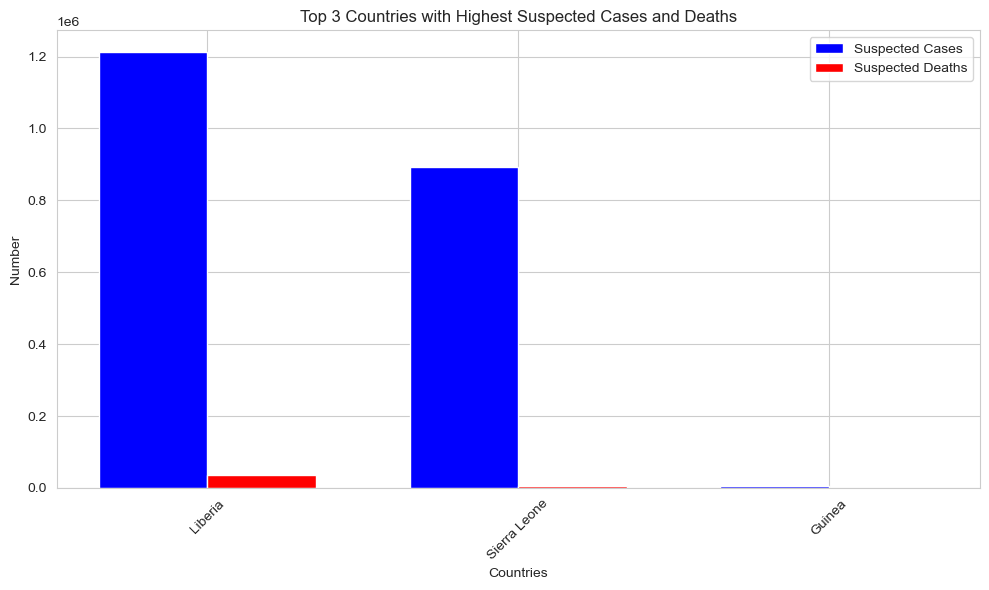

In [13]:

# Compute the top 3 countries with the highest number of suspected cases and deaths
top_suspected_cases = ebola_data.groupby('Country')['No. of suspected cases'].sum().nlargest(3)
top_suspected_deaths = ebola_data.groupby('Country')['No. of suspected deaths'].sum().nlargest(3)

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Width of each bar
bar_width = 0.35

# Index for the x-axis
index = np.arange(len(top_suspected_cases))

# Plotting suspected cases
bars_cases = ax.bar(index, top_suspected_cases, bar_width, label='Suspected Cases', color='blue')

# Plotting suspected deaths
bars_deaths = ax.bar(index + bar_width, top_suspected_deaths, bar_width, label='Suspected Deaths', color='red')

# Labeling the axes and title
ax.set_xlabel('Countries')
ax.set_ylabel('Number')
ax.set_title('Top 3 Countries with Highest Suspected Cases and Deaths')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_suspected_cases.index, rotation=45)
ax.legend()

# Adding grid
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [22]:
#Countries with the highest number of probable cases(3)
ebola_data.groupby('Country')['No. of probable cases'].sum().nlargest(3)

Country
Liberia         474103.0
Guinea          100201.0
Sierra Leone     67657.0
Name: No. of probable cases, dtype: float64

In [23]:
#Countries with the highest number of probable deaths(3)
ebola_data.groupby('Country')['No. of probable deaths'].sum().nlargest(3)

Country
Guinea          99799.0
Sierra Leone    50786.0
Liberia          8676.0
Name: No. of probable deaths, dtype: float64

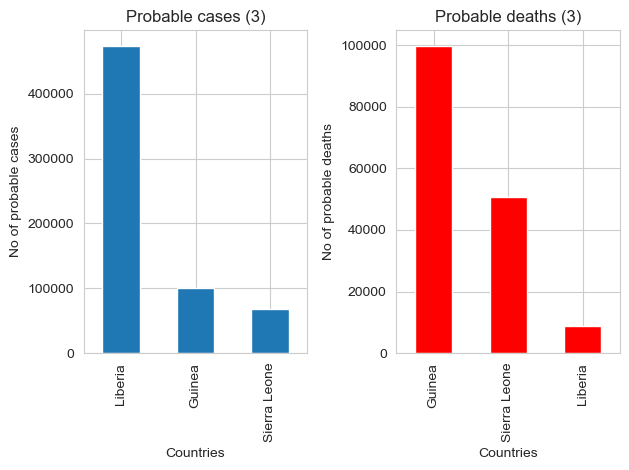

In [24]:
#Barchart showing Countries with the highest number of probable cases and highest number of probable deaths(3)
plt.subplot(1,2,1)
ebola_data.groupby('Country')['No. of probable cases'].sum().nlargest(3).plot(kind = 'bar', grid = True)
plt.title('Probable cases (3)')
plt.xlabel('Countries')
plt.ylabel('No of probable cases')
plt.subplot(1,2,2)
ebola_data.groupby('Country')['No. of probable deaths'].sum().nlargest(3).plot(kind = 'bar', grid = True,
                                                                       color = 'red')
plt.title('Probable deaths (3)')
plt.xlabel('Countries')
plt.ylabel('No of probable deaths')
plt.tight_layout()
plt.show()

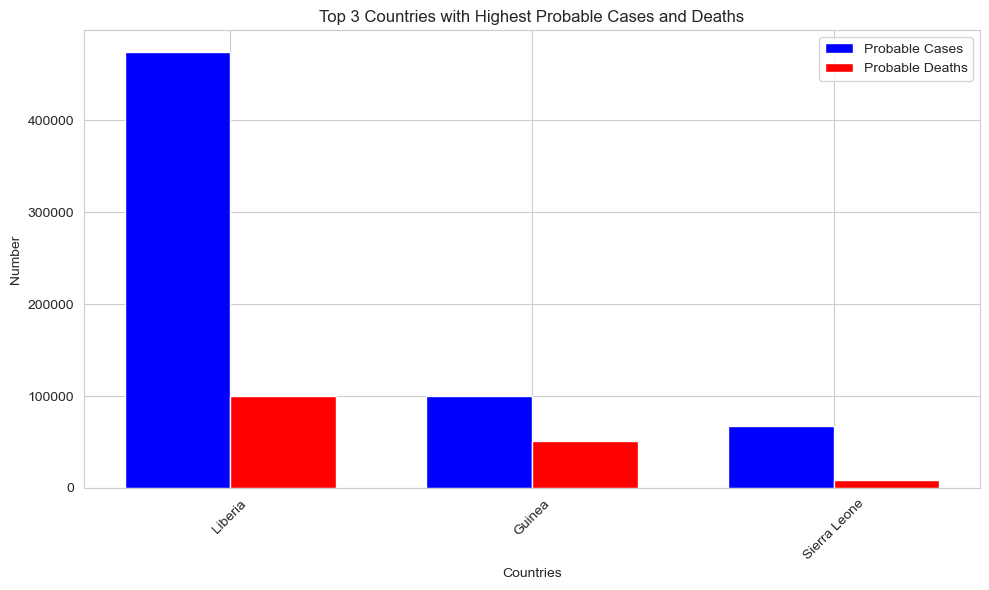

In [25]:
# Compute the top 3 countries with the highest number of probable cases and deaths
top_probable_cases = ebola_data.groupby('Country')['No. of probable cases'].sum().nlargest(3)
top_probable_deaths = ebola_data.groupby('Country')['No. of probable deaths'].sum().nlargest(3)

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Width of each bar
bar_width = 0.35

# Index for the x-axis
index = np.arange(len(top_probable_cases))

# Plotting probable cases
bars_cases = ax.bar(index, top_probable_cases, bar_width, label='Probable Cases', color='blue')

# Plotting probable deaths
bars_deaths = ax.bar(index + bar_width, top_probable_deaths, bar_width, label='Probable Deaths', color='red')

# Labeling the axes and title
ax.set_xlabel('Countries')
ax.set_ylabel('Number')
ax.set_title('Top 3 Countries with Highest Probable Cases and Deaths')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_probable_cases.index, rotation=45)
ax.legend()

# Adding grid
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
#Countries with the lowest number of confirmed cases(3)
ebola_data.groupby('Country')['No. of confirmed cases'].sum().nsmallest(3)